## Business Case:-  AI-Powered Activity Recognition for Wearable Technology
* A wearable technology company wants to analyze user movement patterns using smartwatch sensor data. The dataset contains timestamps, user identifiers, wrist placement, activity type, and motion sensor readings (acceleration and gyroscope values). By leveraging this data, the company aims to develop an AI-powered activity recognition system that can classify user activities (e.g., walking, running, sitting) in real-time. This system can be used for fitness tracking, health monitoring, and workplace safety applications. Additionally, the insights gained from wrist movement and motion patterns can help detect anomalies, such as falls or sudden movements, which can be crucial for elderly care and sports injury prevention.

## Domain Analysis

* Domain Analysis is the process of studying and understanding a specific domain to identify key concepts, requirements, challenges, and opportunities. It involves gathering information about the domain’s structure, terminology, stakeholders, and business processes to create models or frameworks that can be used for system development, decision-making, or optimization.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_csv("walkrun.csv")
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


### Attribute Information

**date –** The date when the data was recorded.

**time –** The exact time the data was recorded.

**username –** The identifier for the user wearing the device.

**wrist –** Indicates which wrist the device was worn on (e.g., left or right).

**activity –** The type of activity the user was performing (e.g., walking, running, sitting).

**acceleration_x –** Acceleration along the X-axis (movement in a specific direction).

**acceleration_y –** Acceleration along the Y-axis (movement in another direction).

**acceleration_z –** Acceleration along the Z-axis (movement in the third direction).

**gyro_x –** Gyroscope reading for rotational movement around the X-axis.

**gyro_y –** Gyroscope reading for rotational movement around the Y-axis.

**gyro_z –** Gyroscope reading for rotational movement around the Z-axis.

## Basic Check

* A Domain Check is the process of verifying and assessing a specific domain to ensure its validity, relevance, and compliance with predefined requirements. The term can be applied in different contexts, including business, technology, and software development.

In [36]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [37]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [38]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [39]:
data.describe(include="O")

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


## EDA:- Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is the process of analyzing, visualizing, and summarizing a dataset to understand its structure, detect patterns, identify outliers, and find relationships between variables before applying machine learning models. It helps in making data-driven decisions and preparing the data for modeling.

### 1. Univariant Analysis

* Univariate analysis is the statistical analysis of a single variable (feature) to understand its distribution, central tendency, spread, and potential outliers. It helps in data exploration before applying machine learning models.

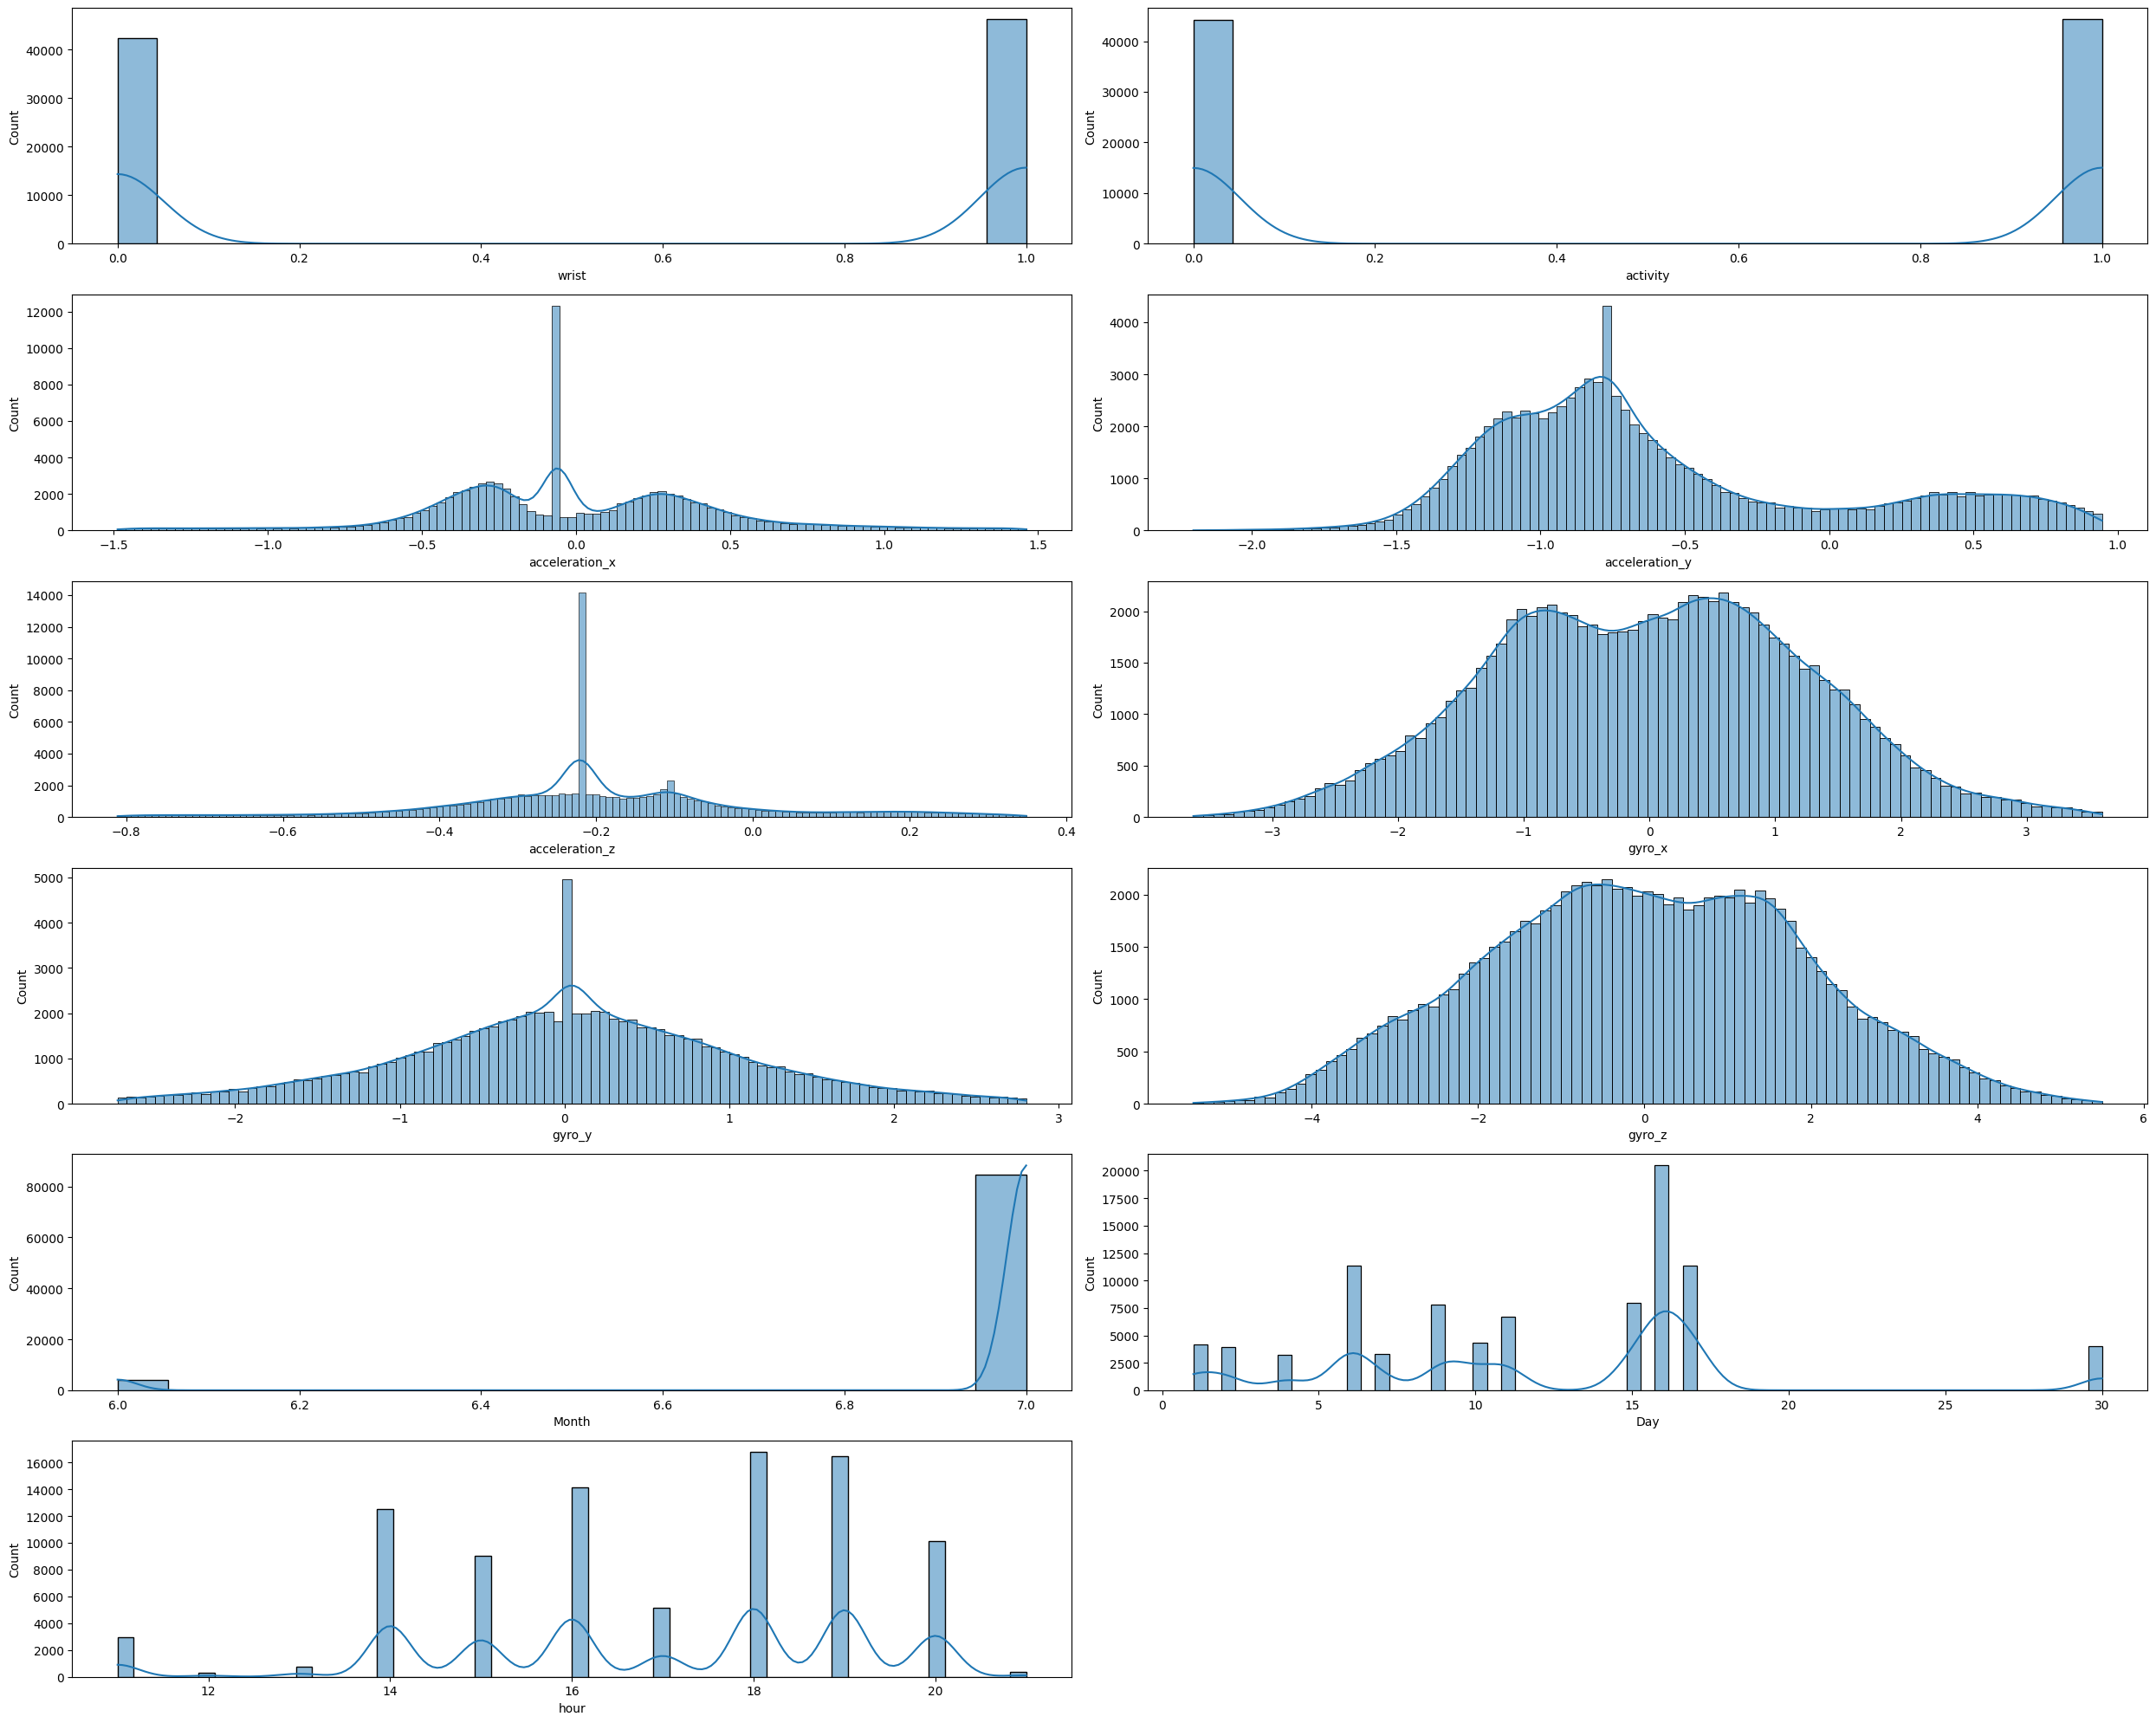

In [209]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 11:
        plt.subplot(6,2,plt_num)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=10)
    plt_num += 1
plt.tight_layout()

### 2. Baivariant Analysis

* Bivariate analysis is the statistical analysis of two variables to determine their relationship, correlation, or dependency. It helps understand how one variable changes with respect to another and is useful for feature selection and hypothesis testing in machine learning.

In [ ]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 11:
        plt.subplot(6,2,plt_num)
        sns.barplot(x = data[column],y = data["activity"])
        plt.xlabel(column,fontsize=10)
    plt_num += 1
plt.tight_layout()

### 3. Multivariant Analysis

* Multivariate analysis is the statistical analysis of three or more variables simultaneously to understand their relationships, dependencies, and interactions. It helps in identifying complex patterns in data that cannot be observed through univariate or bivariate analysis.

In [ ]:
sns.pairplot(data)

## Feature Engineering

* Feature Engineering is the process of selecting, transforming, or creating new features (input variables) from raw data to improve the performance of machine learning models. It involves domain knowledge, creativity, and data preprocessing techniques to ensure that the model learns meaningful patterns from the data.

### 1. Data Preprocessing

* Data Preprocessing is the technique of cleaning, transforming, and preparing raw data for machine learning models. It ensures that data is in a suitable format, free of inconsistencies, and optimized for better model performance.

In [41]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### Outliers

* An outlier is a data point that significantly differs from other observations in a dataset. It deviates so much from the expected pattern that it may indicate errors, variability, or unique events. Outliers can affect statistical analysis and machine learning model performance, making it important to detect and handle them properly.

In [42]:
for col in data.columns:  # Loop through all columns
        if data[col].dtype in ['int64', 'float64']:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)  # First quartile
            Q3 = data[col].quantile(0.75)  # Third quartile
            IQR = Q3 - Q1  # Interquartile range

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            median_value = data[col].median()  # Compute median of column
            
            # Replace outliers with the median
            for i in range(len(data[col])):
                if data[col][i] < lower_bound or data[col][i] > upper_bound:
                    data.at[i, col] = median_value  # Replace using `.at[]`
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [43]:
data["date"] = data["date"].astype("datetime64[ns]")

In [44]:
data["Month"] = pd.to_datetime(data["date"]).dt.month
data["Day"] = pd.to_datetime(data["date"]).dt.day
data["Year"] = pd.to_datetime(data["date"]).dt.year

In [45]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,Year
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30,2017
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30,2017
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30,2017
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30,2017
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30,2017


In [46]:
data.drop(['date'],axis=1,inplace=True)

In [47]:
data.head()

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,Year
0,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30,2017
1,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30,2017
2,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30,2017
3,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30,2017
4,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30,2017


In [49]:
split_time = data["time"].str.split(":", expand=True)

In [50]:
if split_time.shape[1] == 4:
    data["hour"] = split_time[0]
    data["minute"] = split_time[1]
    data["second"] = split_time[2]
else:
    print("Unexpected time format in some rows!")

# Convert columns to integers
data[["hour", "minute", "second"]] = data[["hour", "minute", "second"]].astype(int)

# Drop the original time column
data.drop(columns=["time"], inplace=True)

In [51]:
data.head()

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,Year,hour,minute,second
0,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30,2017,13,51,15
1,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30,2017,13,51,16
2,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30,2017,13,51,16
3,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30,2017,13,51,16
4,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30,2017,13,51,16


In [52]:
data["username"].unique()

array(['viktor'], dtype=object)

In [53]:
data.drop(["username"],axis=1,inplace=True)

In [54]:
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,Year,hour,minute,second
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30,2017,13,51,15
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30,2017,13,51,16
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30,2017,13,51,16
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30,2017,13,51,16
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30,2017,13,51,16


In [55]:
data["wrist"].unique()

array([0, 1], dtype=int64)

In [57]:
data["activity"].unique()

array([0, 1], dtype=int64)

In [58]:
data["Day"].unique()

array([30, 10, 11, 15, 16, 17,  1,  2,  4,  6,  7,  9])

In [59]:
data["Year"].unique()

array([2017])

In [60]:
data.drop(["Year"],axis=1,inplace=True)

In [61]:
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,hour,minute,second
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30,13,51,15
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30,13,51,16
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30,13,51,16
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30,13,51,16
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30,13,51,16


In [62]:
data["hour"].unique()

array([13, 20, 21, 15, 16, 17, 18, 14, 19, 11, 12])

In [194]:
data["activity"].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

### 2. Feature Selection

* Feature Selection is the process of choosing the most relevant and significant features (input variables) from a dataset to improve a machine learning model's performance. It helps in reducing dimensionality, improving model accuracy, and avoiding overfitting by removing irrelevant, redundant, or noisy features.

<Axes: >

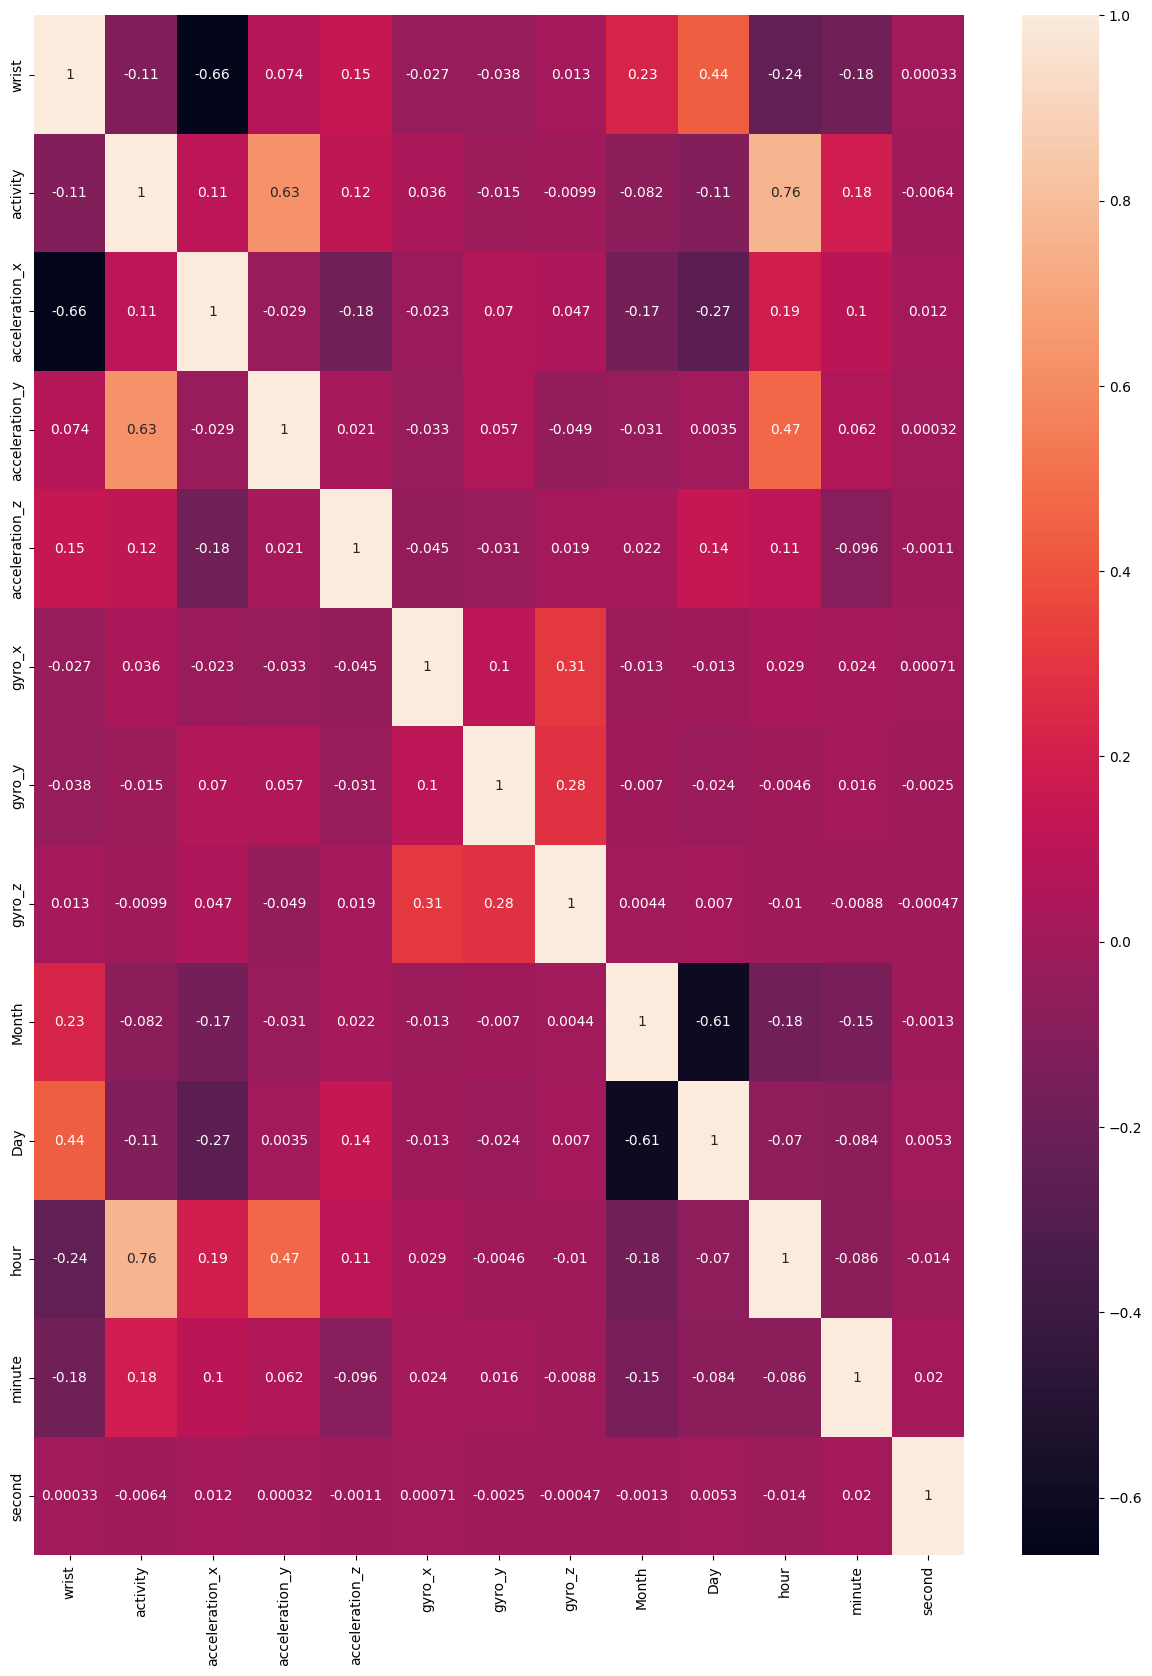

In [64]:
plt.figure(figsize=(15,20))
sns.heatmap(data.corr(),annot=True)

## Model Creation

* Model Creation is the process of building a machine learning model to learn patterns from data and make predictions. It involves selecting an appropriate algorithm, training the model on historical data, and fine-tuning it for optimal performance.

In [65]:
x = data.drop(["activity"],axis=1)
y = data["activity"]

In [66]:
x

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,hour,minute,second
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30,13,51,15
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30,13,51,16
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30,13,51,16
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30,13,51,16
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30,13,51,16
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,7,9,20,9,15
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,7,9,20,9,15
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,7,9,20,9,15
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,7,9,20,9,15


In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
x_train

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,hour,minute,second
25055,1,-0.3397,-1.0766,-0.1964,-1.4754,0.5569,1.3137,7,16,14,20,47
32727,1,-0.5360,-0.6933,-0.2155,0.4166,-2.6889,-1.1556,7,16,14,55,47
23650,1,-0.2235,-0.9828,-0.2516,0.2285,-1.2265,-0.2303,7,16,14,12,3
50746,1,-1.2504,-0.1344,-0.0945,1.5480,-0.1979,1.4103,7,17,20,11,25
26786,1,-0.3740,-1.1595,-0.1948,2.0935,0.0942,-2.7162,7,16,14,28,48
...,...,...,...,...,...,...,...,...,...,...,...,...
21243,1,-0.8158,0.6799,-0.2292,1.5511,-1.7498,2.4386,7,15,18,4,22
45891,0,0.4380,-0.7668,0.0573,-0.6439,0.4513,-1.4439,7,17,16,1,22
42613,1,-0.3671,-1.2308,-0.1798,-1.7297,-0.6661,1.6943,7,16,15,6,42
43567,0,0.4175,-1.0093,-0.0254,-0.2650,1.8116,0.6861,7,17,16,10,27


In [70]:
x_test

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,hour,minute,second
88575,0,0.1785,-0.8660,-0.0029,-1.2414,1.0100,-1.1457,7,9,20,9,13
19025,1,-0.0595,-0.4102,0.0506,-2.0148,1.1559,-2.2582,7,15,18,23,30
54878,0,0.4782,-1.2374,-0.1732,-1.2305,-0.6317,-1.5352,7,1,16,10,13
64117,0,0.4668,-1.4141,-0.2210,0.7823,0.7415,0.5908,7,4,19,31,59
16543,1,-1.2198,-0.1435,-0.1059,1.1129,-0.2604,1.4089,7,15,18,14,32
...,...,...,...,...,...,...,...,...,...,...,...,...
954,0,0.3469,-0.7591,-0.3449,-1.1445,0.8336,0.1539,6,30,20,34,48
67767,0,0.0694,-1.1651,-0.2645,1.4318,0.4950,1.9129,7,6,16,1,31
79386,0,0.2110,-0.9903,-0.0672,1.5991,0.7864,2.5515,7,7,11,56,11
27708,1,-0.2704,-1.3037,-0.3076,1.3432,-0.8684,-1.1144,7,16,14,31,26


## Model Selection

* Model Selection is the process of choosing the best machine learning model for a given dataset and problem. It involves evaluating multiple models based on performance metrics, complexity, and generalization ability to select the most suitable one.

### Logistic Regression

* Logistic Regression is a supervised learning algorithm used for binary classification problems, where the target variable has two possible outcomes (e.g., 0 or 1, Yes or No, Spam or Not Spam). It predicts the probability that a given input belongs to a particular class.

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

### Logistic Regression Metrics

* Logistic Regression is evaluated using several key metrics to measure its performance in classification tasks. Accuracy is a common metric that calculates the percentage of correctly classified instances out of the total instances, but it can be misleading for imbalanced datasets. A Confusion Matrix provides a detailed breakdown of actual versus predicted classifications, showing True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Precision measures the proportion of correctly predicted positive instances out of all predicted positives, making it crucial in scenarios where minimizing false positives is important, such as spam detection. Recall, also known as Sensitivity or True Positive Rate, calculates how many actual positive instances were correctly identified, making it vital in cases where minimizing false negatives is essential, such as medical diagnoses. These metrics help in assessing the effectiveness of a Logistic Regression model and determining its suitability for specific classification problems.

In [72]:
from sklearn.metrics import *

In [73]:
y_lr = lr.predict(x_test)

In [167]:
a1 = accuracy_score(y_test,y_lr)
a1

0.9449900289724198

In [75]:
y_tlr = lr.predict(x_train)

In [168]:
t1 = accuracy_score(y_train,y_tlr)
t1

0.9473319249810518

In [133]:
confusion_matrix(y_test,y_lr)

array([[12355,   883],
       [  579, 12760]], dtype=int64)

In [77]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     13238
           1       0.94      0.96      0.95     13339

    accuracy                           0.94     26577
   macro avg       0.95      0.94      0.94     26577
weighted avg       0.95      0.94      0.94     26577



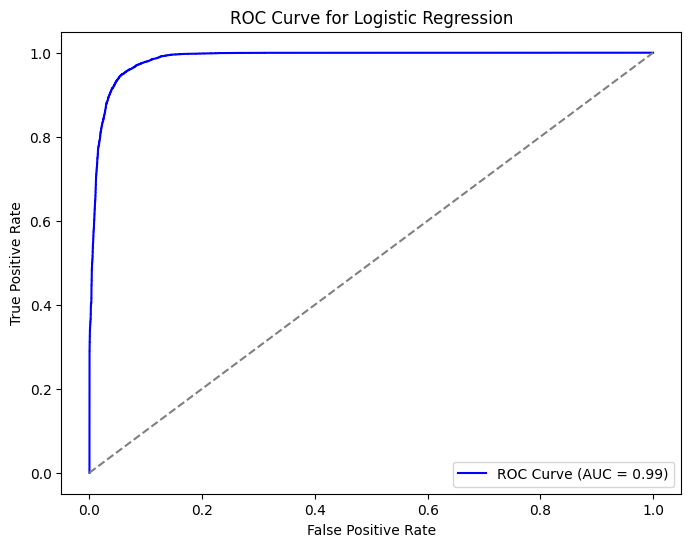

In [196]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### SVM:- Support Vectore Machine

* Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks. It is a variant of Support Vector Machine (SVM) that finds the optimal decision boundary (hyperplane) to separate classes in a dataset. SVC is effective for both binary and multi-class classification problems.

In [78]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [79]:
y_svm = svm.predict(x_test)

In [169]:
a2 = accuracy_score(y_test,y_svm)
a2

0.955262068706024

In [81]:
y_tsvm = svm.predict(x_train)

In [170]:
t2 = accuracy_score(y_train,y_tsvm)
t2

0.9561690667784748

In [134]:
confusion_matrix(y_test,y_svm)

array([[12181,  1057],
       [  132, 13207]], dtype=int64)

In [197]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     13238
           1       0.93      0.99      0.96     13339

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



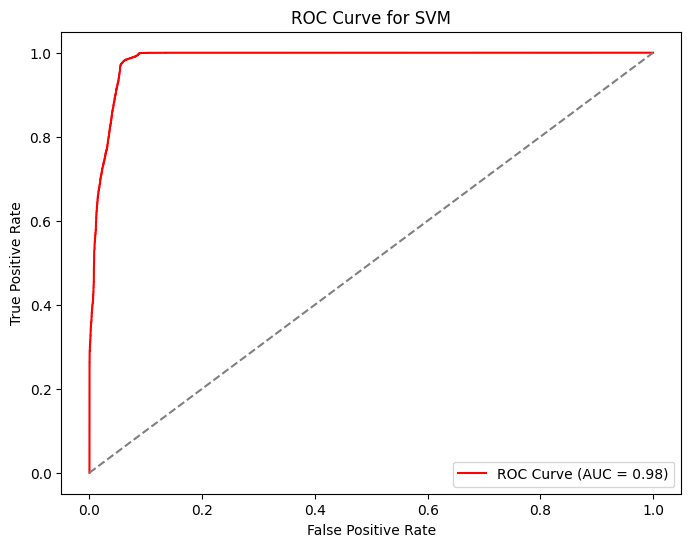

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

# Train SVM model with probability enabled
model = SVC(probability=True)  
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Algorithm

* Decision Tree Classification is a supervised machine learning algorithm used for classification tasks. It works by recursively splitting the dataset into smaller subsets based on feature values, forming a tree-like structure. The goal is to create a model that predicts the class of a target variable based on input features.

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,min_samples_split=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=6, random_state=42)

In [136]:
y_dt = dt.predict(x_test)

In [171]:
a3 = accuracy_score(y_test,y_dt)
a3

0.9961620950445874

In [138]:
y_tdt = dt.predict(x_train) 

In [172]:
t3 = accuracy_score(y_train,y_tdt)
t3

0.9995968457209204

In [140]:
confusion_matrix(y_test,y_dt)

array([[13185,    53],
       [   49, 13290]], dtype=int64)

In [89]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13238
           1       1.00      1.00      1.00     13339

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



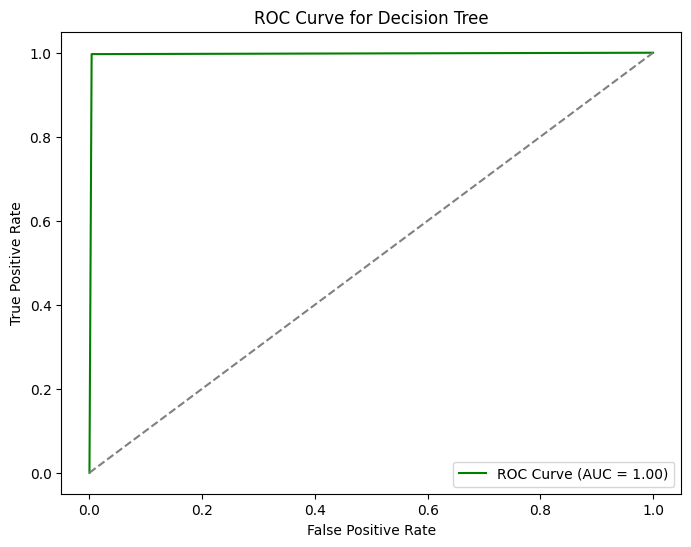

In [199]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

## Bagging Algorithm

* Bagging (Bootstrap Aggregating) is an ensemble learning technique that improves the stability and accuracy of machine learning models, particularly for high-variance models like Decision Trees. The idea is to train multiple models on different random subsets of the dataset and then combine their predictions to produce a more robust and generalized model.

In [108]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [109]:
y_bg = bg.predict(x_test)

In [173]:
a4 = accuracy_score(y_test,y_bg)
a4

0.9972156375813673

In [111]:
y_tbg = bg.predict(x_train)

In [174]:
t4 = accuracy_score(y_train,y_tbg)
t4

0.9998709906306945

In [141]:
confusion_matrix(y_test,y_bg)

array([[13210,    28],
       [   46, 13293]], dtype=int64)

In [200]:
print(classification_report(y_test,y_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13238
           1       1.00      1.00      1.00     13339

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



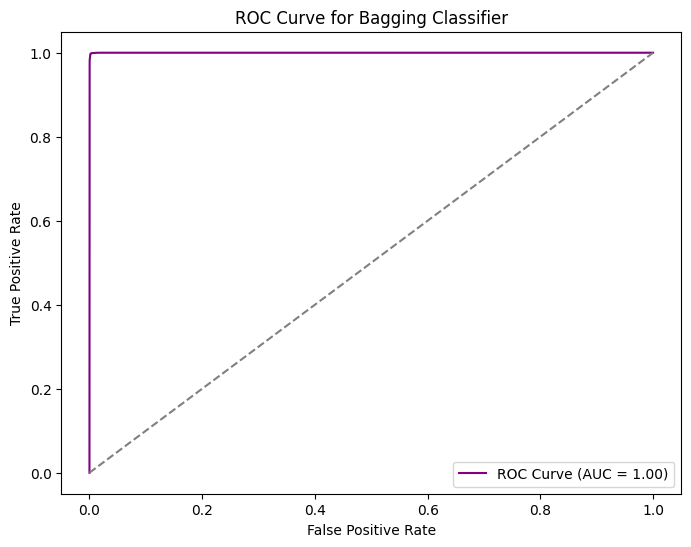

In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Train Bagging Classifier with base estimator as Decision Tree
model = BaggingClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Classifier')
plt.legend(loc='lower right')
plt.show()

## RandomForest Algorithm

* Random Forest is an ensemble learning algorithm that improves the performance of Decision Trees by reducing overfitting and increasing accuracy. It is built on the Bagging (Bootstrap Aggregating) technique, where multiple Decision Trees are trained on different subsets of the data, and their outputs are combined to make a final prediction.

In [142]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(random_state=42,min_samples_split=6)
rm.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=6, random_state=42)

In [143]:
y_rm = rm.predict(x_test)

In [175]:
a5 = accuracy_score(y_test,y_rm)
a5

0.9991345900590737

In [145]:
y_trm = rm.predict(x_train)

In [176]:
t5 = accuracy_score(y_train,y_trm)
t5

0.9998387382883682

In [148]:
confusion_matrix(y_test,y_rm)

array([[13219,    19],
       [    4, 13335]], dtype=int64)

In [147]:
print(classification_report(y_test,y_rm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13238
           1       1.00      1.00      1.00     13339

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



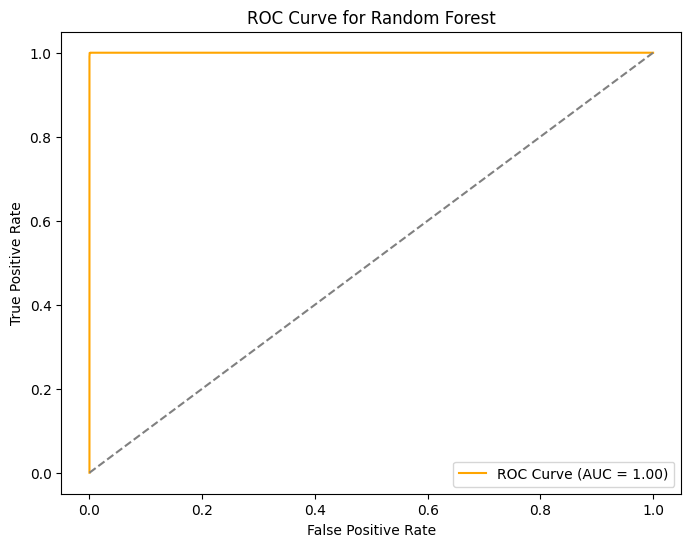

In [203]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

## Gradiant Boosting Algorithm

* Gradient Boosting is a powerful ensemble learning technique that builds a strong predictive model by combining multiple weak models (usually Decision Trees) in a sequential manner. Unlike Bagging (e.g., Random Forest), which trains trees independently, Gradient Boosting trains trees iteratively, with each tree correcting the mistakes of the previous one.

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [115]:
y_gb = gb.predict(x_test)

In [177]:
a6 = accuracy_score(y_test,y_gb)
a6

0.9949204199119539

In [117]:
y_tgb = gb.predict(x_train)

In [178]:
t6 = accuracy_score(y_train,y_tgb)
t6

0.9954362935608199

In [149]:
confusion_matrix(y_test,y_gb)

array([[13153,    85],
       [   50, 13289]], dtype=int64)

In [119]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13238
           1       0.99      1.00      0.99     13339

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



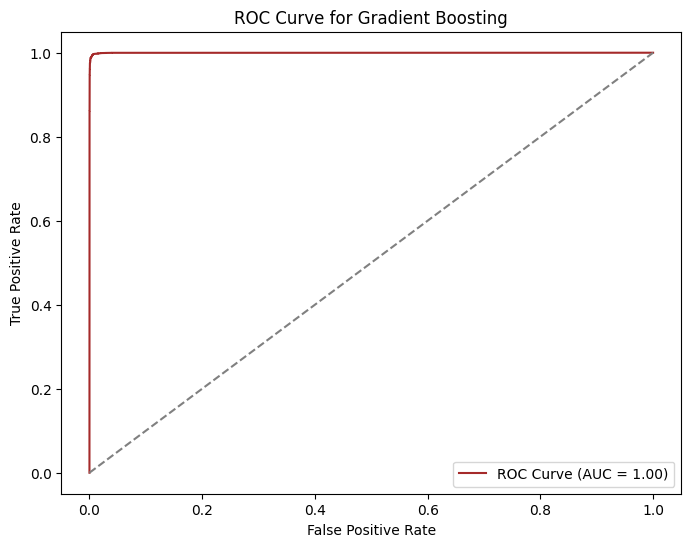

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

## XGBoost Algorithm

* XGBoost (Extreme Gradient Boosting) is an optimized and high-performance implementation of the Gradient Boosting Algorithm. It is widely used for classification, regression, and ranking problems due to its efficiency, scalability, and superior accuracy. XGBoost is designed to handle large datasets with high-dimensional features while preventing overfitting

In [160]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
y_xgb = xgb.predict(x_test)

In [179]:
a7 = accuracy_score(y_test,y_xgb)
a7

0.9991722165782444

In [163]:
y_txgb = xgb.predict(x_train)

In [180]:
t7 = accuracy_score(y_train,y_txgb)
t7

0.9997097289190627

In [166]:
confusion_matrix(y_test,y_xgb)

array([[13226,    12],
       [   10, 13329]], dtype=int64)

In [165]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13238
           1       1.00      1.00      1.00     13339

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



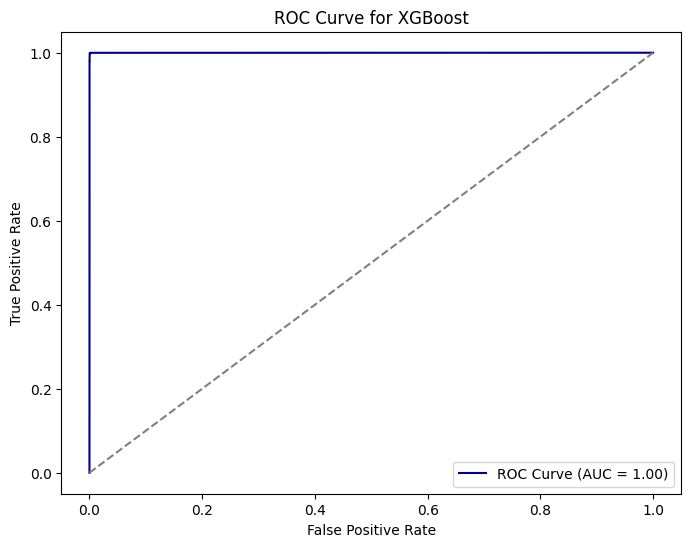

In [205]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

# Train XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

## ANN:- Artificial Neural Network Algorithm

* An Artificial Neural Network (ANN) is a deep learning model inspired by the structure and function of the human brain. It consists of interconnected units called neurons, organized in layers, which learn complex patterns from data. ANNs are widely used in classification, regression, image processing, NLP, speech recognition, and more.

In [126]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(x_train,y_train)

MLPClassifier()

In [127]:
y_ann = ann.predict(x_test)

In [181]:
a8 = accuracy_score(y_test,y_ann)
a8

0.9969146254280017

In [129]:
y_tann = ann.predict(x_train)

In [184]:
t8 = accuracy_score(y_train,y_tann)
t8

0.996161971263163

In [132]:
confusion_matrix(y_test,y_ann)

array([[13166,    72],
       [   10, 13329]], dtype=int64)

In [131]:
print(classification_report(y_test,y_ann))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13238
           1       0.99      1.00      1.00     13339

    accuracy                           1.00     26577
   macro avg       1.00      1.00      1.00     26577
weighted avg       1.00      1.00      1.00     26577



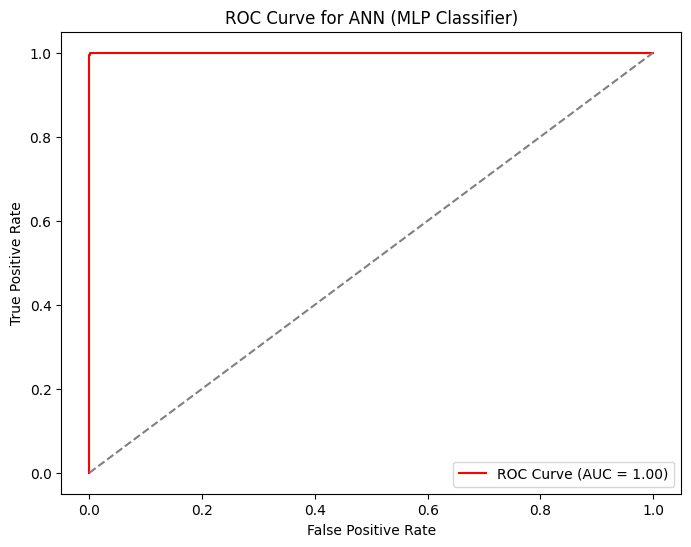

In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier

# Train ANN model (MLP Classifier)
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN (MLP Classifier)')
plt.legend(loc='lower right')
plt.show()

## Model Comparison Report

In [185]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","SVM Algorithm","DecisionTreeClassifier","Bagging Algorithm","RandomForestClassifier","GradiantBoosting Algorithm","XGBClassifirer Algorithm","ANN_MLPClassifer Algorithm"],
                     "Accuracy_Score":[a1*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a8*100],
                      "Traning Accuracy_score":[t1*100,t2*100,t3*100,t4*100,t5*100,t6*100,t7*100,t8*100]})
score

,Model,Accuracy_Score,Traning Accuracy_score
0,LogisticRegression,94.499003,94.733192
1,SVM Algorithm,95.526207,95.616907
2,DecisionTreeClassifier,99.616210,99.959685
3,Bagging Algorithm,99.721564,99.987099
4,RandomForestClassifier,99.913459,99.983874
5,GradiantBoosting Algorithm,99.492042,99.543629
6,XGBClassifirer Algorithm,99.917222,99.970973
7,ANN_MLPClassifer Algorithm,99.691463,99.616197


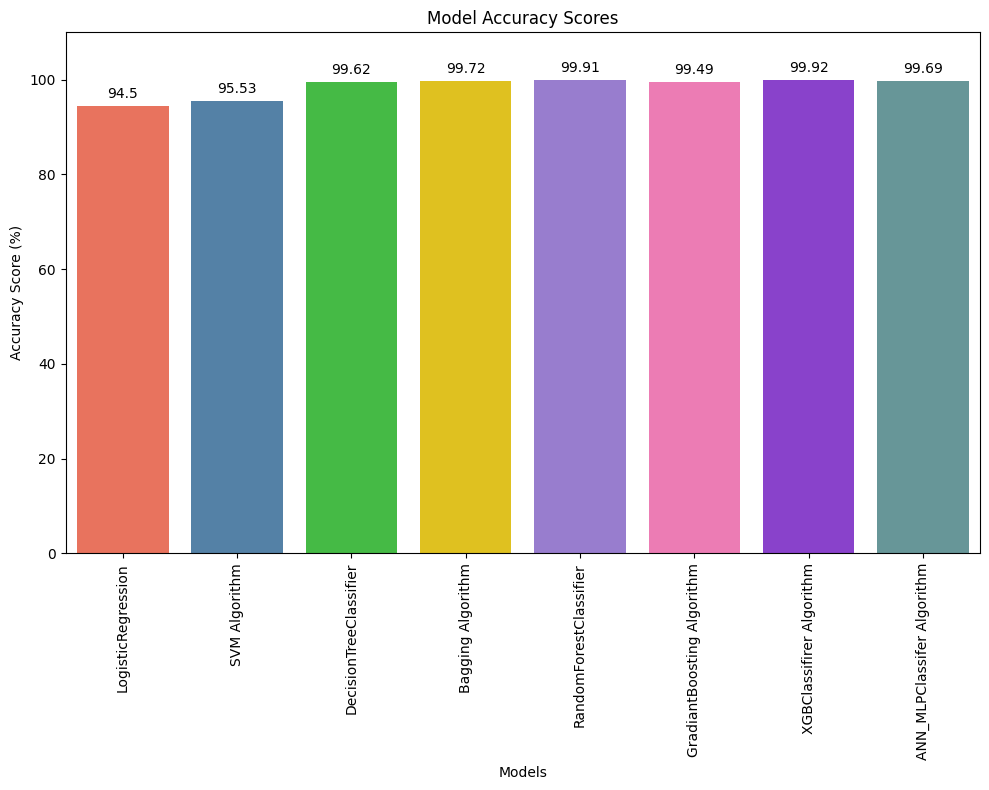

In [186]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Accuracy_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion**

* Based on the model performance evaluation, all models have shown high accuracy, with some performing exceptionally well.
* For the best balance of accuracy and generalization, XGBoost and Random Forest are top choices as they provide near-perfect accuracy while avoiding overfitting.
* Bagging and Decision Trees are also strong contenders but should be monitored for overfitting.
* If model interpretability is required, Logistic Regression or SVM would be better choices, though at the cost of slightly lower accuracy.
ANN performed well but may require further tuning for optimal performance.

## Challenges Faced in Model Development

**1. Wrong Data Types:**

* The dataset contained incorrect data types, leading to issues in processing and feature extraction.
Some numerical columns were stored as categorical, and vice versa, affecting model performance.

**2. Exploratory Data Analysis (EDA):**

* Identifying missing values and outliers was a key challenge.
Data distribution analysis revealed inconsistencies that needed to be addressed before model training.

**3. Overfitting Issue:**

* Some models, especially tree-based algorithms, showed significantly higher training accuracy compared to test accuracy.
This indicated overfitting, where the model memorized training data instead of generalizing well on new data.

**4. Data Extraction Issues:**

* Extracting relevant features from raw data was complex due to unstructured or inconsistent formats.
Feature engineering required careful selection of meaningful attributes to improve model performance.

## Model Save

In [212]:
import pickle
with open("walkrun.pkl","wb") as f:
    pickle.dump(xgb,f)

In [213]:
with open("walkrun.pkl","rb") as f:
    file = pickle.load(f)

In [214]:
file

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [215]:
x_train.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Month,Day,hour,minute,second
25055,1,-0.3397,-1.0766,-0.1964,-1.4754,0.5569,1.3137,7,16,14,20,47
32727,1,-0.5360,-0.6933,-0.2155,0.4166,-2.6889,-1.1556,7,16,14,55,47
23650,1,-0.2235,-0.9828,-0.2516,0.2285,-1.2265,-0.2303,7,16,14,12,3
50746,1,-1.2504,-0.1344,-0.0945,1.5480,-0.1979,1.4103,7,17,20,11,25
26786,1,-0.3740,-1.1595,-0.1948,2.0935,0.0942,-2.7162,7,16,14,28,48


In [216]:
y_train.head()

25055    0
32727    0
23650    0
50746    1
26786    0
Name: activity, dtype: int64

In [217]:
file.predict([[1,	-0.3397,	-1.0766,	-0.1964,	-1.4754,	0.5569,	1.3137,	7,	16,	14,	20,	47]])

array([0])

In [218]:
file.predict([[1	,-1.2504,	-0.1344,	-0.0945,	1.5480,	-0.1979,	1.4103,	7,	17,	20,	11,	25]])

array([1])

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Thank You
</div>

In [219]:
import streamlit as st
import pickle
import numpy as np
import os

# Check if model file exists
model_path = "walkrun.pkl"

if not os.path.exists(model_path):
    st.error("Model file 'walkrun.pkl' not found. Please upload the correct model file.")
    st.stop()

try:
    with open(model_path, "rb") as model_file:
        model = pickle.load(model_file)
except Exception as e:
    st.error(f"Error loading model: {str(e)}")
    st.stop()

In [220]:
import joblib
model = joblib.load("walkrun.pkl")

In [222]:
import pickle
import joblib

# Save with Pickle
with open("walkrun.pkl", "wb") as f:
    pickle.dump(model, f)

# Save with Joblib (alternative)
joblib.dump(model, "walkrun.pkl")

['walkrun.pkl']